In [13]:
from math import *
from random import uniform as rng

## Global data

In [15]:
LV_MAX = 196
HIT_DAMAGE_LIMIT = 999999

### Character properties

In [5]:
# Properties of Luna

LUNA = {
    'attack': 14799 + (240 + 15 * LV_MAX),
    'critical': 1162,
    'defence_phys': 214,
    'defence_magic': 316,
    'hp': 23708,
    'tp_rise': 13,
    'tp_rest': 28
}

LUNA_4 = {
    'attack': 14237 + (240 + 15 * LV_MAX),
    'critical': 1162,
    'defence_phys': 190,
    'defence_magic': 292,
    'hp': 20217,
    'tp_rise': 13,
    'tp_rest': 28
}

LUNA_3 = {
    'attack': 13673 + (240 + 15 * LV_MAX),
    'critical': 1162,
    'defence_phys': 163,
    'defence_magic': 265,
    'hp': 16723,
    'tp_rise': 13,
    'tp_rest': 28
}


# Properties of Nyaru

NYARU = {
    'attack': 15367 + (240 + 15 * LV_MAX),
    'critical': 1367,
    'defence_phys': 227,
    'defence_magic': 23479,
    'hp': 23479,
    'tp_rise': 13,
    'tp_rest': 17
}

NYARU_4 = {
    'attack': 14792 + (240 + 15 * LV_MAX),
    'critical': 1367,
    'defence_phys': 201,
    'defence_magic': 268,
    'hp': 20041,
    'tp_rise': 13,
    'tp_rest': 17
}

NYARU_3 = {
    'attack': 14217 + (240 + 15 * LV_MAX),
    'critical': 1367,
    'defence_phys': 172,
    'defence_magic': 246,
    'hp': 16599,
    'tp_rise': 13,
    'tp_rest': 17
}

### Skills and battle fomules

In [26]:
def tp_integer(tp_orignal, tp_rise):
    return round(tp_orignal * (1 + tp_rise/100.))

def yukari_tp(tp_rise, lv = LV_MAX):
    return round((75 + 2.5 *lv) * (1+tp_rise/100.))

def miren_tp(tp_rise, lv = LV_MAX):
    return round((250 + 1.35 * lv))

def action_tp(tp_rise, lv = LV_MAX):
    return round(90*(1+tp_rise/100.))

def hurt_tp_magic(damage, role):
    return hurt_tp(damage, role['hp'], role['defence_magic'],role['tp_rise'])

def hurt_tp(damage, hp, defence, tp_rise):
    return round(damage/(1+defence/100.) / hp * 500 * (1+tp_rise/100.))

def LogBarrier(damage, threshold=850000, factor=100000):
    if(damage < threshold):
        return damage
    else:
        return (factor * log((damage-threshold)/factor + 1) + threshold)
  
def critical_rate(criVal, enemyLv, lv = LV_MAX):
    return (0.05 * criVal / 100 * lv / enemyLv)

def critical_damage(orignalDamage, rate, criticalCoeff = 2.0, criticalDamageBuff = 0.):
    hit = 0
    if(rng(0,1) < rate ):
        hit = round(orignalDamage * criticalCoeff * (1 + criticalDamageBuff))
    else:
        hit = round(orignalDamage)
    return min(HIT_DAMAGE_LIMIT, hit)

def nyaruUB(atackWithBuff, criticalWithBuff, criticalDamageBuff = 0., enemyLv = LV_MAX, lv = LV_MAX, detail=False):
    # split in 10 parts = 1/13 * 9 + 4/13
    totalDamage = 0
    orignalDamage = 60 * (LV_MAX + 1 ) + 4.8 * atackWithBuff
    for i in ([1] * 9 + [4]):
        totalDamage += critical_damage(orignalDamage*i/13, critical_rate(criticalWithBuff, enemyLv, lv), criticalCoeff = 2.0, criticalDamageBuff = 0.)
    if detail:
        return [round(orignalDamage * 1/13), round(orignalDamage * 4/13), totalDamage]
    else:
        return totalDamage

In [19]:
print(action_tp(13)*2 + yukari_tp(13))
print(hurt_tp_magic(LUNA['attack'], NYARU_3))

842
177
201694


### Test : Nyaru UB damage distribution

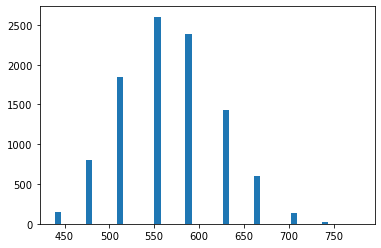

In [64]:
ex4start = lambda x : nyaruUB(NYARU['attack'] + (28+10.5+10.5+20+6+18) * (LV_MAX +1) + 1308, NYARU['critical']+180,0.15,400)
ex4start(0)
import numpy as np
import matplotlib.pyplot as plt
ex4nyaru = lambda x : nyaruUB(NYARU['attack'] + x, NYARU['critical']+180,0.25,400)
a = [ex4nyaru(1000000)/10000 for i in range(0,10000)]
_ = plt.hist(a, bins='auto')

In [50]:
nyaruUB(NYARU['attack'] + (28+10.5+10.5+20+6+18) * (LV_MAX +1) + 1308, NYARU['critical'],0.15,400, LV_MAX, True)

[15005, 60020, 300100]

### TP interger check

In [10]:
tp_cache = 1.10
tp_charge = 107.9
tp_charge_int = 108

for i in range(0,20):
    tp_up_tmp = tp_cache + 0.01 * i
    print('%.2f %.2f %.2f' % (tp_up_tmp, tp_charge * tp_up_tmp, tp_charge_int * tp_up_tmp))

1.10 118.69 118.80
1.11 119.77 119.88
1.12 120.85 120.96
1.13 121.93 122.04
1.14 123.01 123.12
1.15 124.09 124.20
1.16 125.16 125.28
1.17 126.24 126.36
1.18 127.32 127.44
1.19 128.40 128.52
1.20 129.48 129.60
1.21 130.56 130.68
1.22 131.64 131.76
1.23 132.72 132.84
1.24 133.80 133.92
1.25 134.88 135.00
1.26 135.95 136.08
1.27 137.03 137.16
1.28 138.11 138.24
1.29 139.19 139.32


## Damage limit with log barrier

Example: Kaya vs b1 2021/01, [video](https://www.youtube.com/watch?v=DA6hy8W1RTQ)

In [11]:
eff_lv = 187
kaya_attack = 17337
damage_final = 856088
buff_miren = (18+2.5) * (eff_lv +1)
buff_self = (20 *2 + 72) * (1 + eff_lv)

damage = (120 * (eff_lv +1 ) + 9.6 * (kaya_attack + buff_miren + buff_self)) *2
print(int(damage), int(LogBarrier(damage)), int (damage_final))

856262 856074 856088


In [ ]:
critical_rate()